# What are the most demanded skills for the top 3 most popular data roles?

#### Methodology
1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final finding

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Booheymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df_india = df[df['job_country']=='India'].explode('job_skills')

In [18]:
df_skills_counts = df_india.groupby(['job_skills','job_title_short']).size()
df_skills_counts = df_skills_counts.reset_index(name='skill_counts')
df_skills_counts = df_skills_counts.sort_values(by='skill_counts',ascending=False)
df_skills_counts

,job_skills,job_title_short,skill_counts
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [20]:
df_india_top_3_job_titles =  df_skills_counts['job_title_short'].unique().tolist()[:3]
df_india_top_3_job_titles

['Data Engineer', 'Data Scientist', 'Data Analyst']

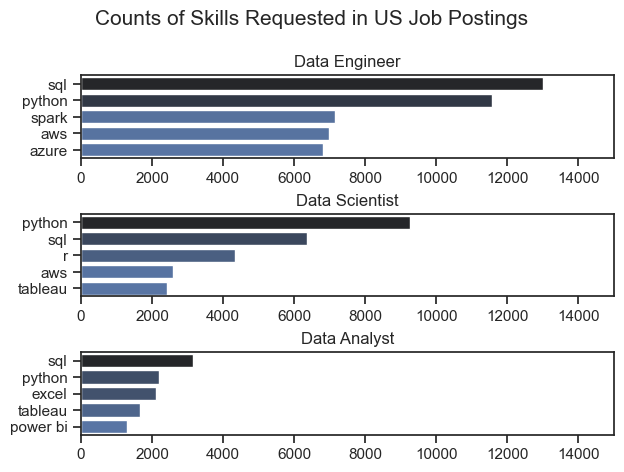

In [25]:
fig, ax = plt.subplots(len(df_india_top_3_job_titles),1)

sns.set_theme(style='ticks')

for i,job_title in enumerate(df_india_top_3_job_titles):
    df_plot = df_skills_counts[df_skills_counts['job_title_short']==job_title].head(5)[::-1]
    sns.barplot(
        data=df_plot,
        x='skill_counts',
        y='job_skills',
        ax=ax[i],
        hue='skill_counts', 
        palette='dark:b_r'
    )
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 15000)

fig.suptitle('Counts of Skills Requested in India Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()    

In [26]:
# Use original df to get the count of job titles
df_job_title_count = df_india['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,128144
1,Data Scientist,70549
2,Senior Data Engineer,33249
3,Data Analyst,23525
4,Senior Data Scientist,13920
5,Software Engineer,10751
6,Business Analyst,6292
7,Senior Data Analyst,4916
8,Machine Learning Engineer,4484
9,Cloud Engineer,1877


In [28]:
df_skills_perc = pd.merge(df_skills_counts, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_counts'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_counts,jobs_total,skill_percent
0,sql,Data Engineer,12993,128144,10.139374
1,python,Data Engineer,11568,128144,9.027344
2,python,Data Scientist,9248,70549,13.108620
3,spark,Data Engineer,7157,128144,5.585123
4,aws,Data Engineer,6993,128144,5.457142
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,70549,0.001417
1685,node.js,Senior Data Analyst,1,4916,0.020342
1686,matlab,Cloud Engineer,1,1877,0.053277
1687,fastapi,Cloud Engineer,1,1877,0.053277


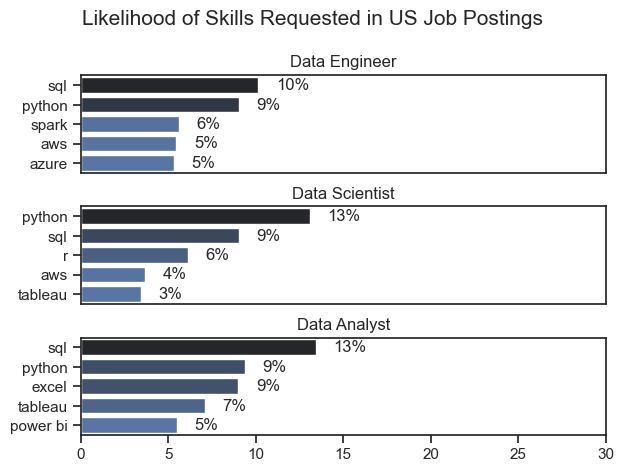

In [31]:
fig, ax = plt.subplots(len(df_india_top_3_job_titles), 1)


for i, job_title in enumerate(df_india_top_3_job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_counts', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 30)
    # remove the x-axis tick labels for better readability
    if i != len(df_india_top_3_job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in India Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()